In [2]:
# імпорт бібліотек
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Activation,
    Flatten,
    MaxPooling2D,
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

## Допоміжні функції


In [72]:
def load_image(file_path):
    """
    Функція зчитування зображення.

    Parameters:
    - `flag (int)`: Прапорець для cv2.imread, вказує режим завантаження (наприклад, cv2.IMREAD_COLOR).

    Returns:
    - `numpy.ndarray or None`: Зображення у форматі NumPy ndarray або None, якщо завантаження не вдалося.
    """

    if not file_path:
        return None
    if not os.path.isfile(file_path):
        return None

    # Завантажуємо кольорове зображення
    return imread(file_path)

def make_prediction(data_element, model):
    predict_number = data_element
    plt.imshow(predict_number, cmap="gray")
    plt.title(f"Зображення")
    plt.show()

    image_test = predict_number.reshape(1, 28, 28, 1)
    predictions = model.predict(image_test)
    predicted_class = np.argmax(predictions)

    # Print the result
    print("Нейронка вважає що це цифра: ", predicted_class)

def plot_metrics(history):
    train_accuracy = history.history["accuracy"]
    test_accuracy = history.history["val_accuracy"]

    train_loss = history.history["loss"]
    test_loss = history.history["val_loss"]

    epochs = range(1, len(train_accuracy) + 1)

    # First subplot
    plt.plot(epochs, train_accuracy, "r", label="Точність на навчанні")
    plt.plot(epochs, test_accuracy, "b", label="Точність на тесті")
    plt.title("Графік залежності точності від кількості епох")
    plt.xlabel("Епохи")
    plt.ylabel("Точність")
    plt.legend()
    plt.show()

    plt.plot(epochs, train_loss, "r", label="Втрати на навчанні")
    plt.plot(epochs, test_loss, "b", label="Втрати на тесті")
    plt.title("Графік залежності втрат від кількості епох")
    plt.xlabel("Епохи")
    plt.ylabel("Втрати")
    plt.legend()

    plt.show()

## `Завдання 1`. <span style="color:lightblue">Повторити приклад з теоретичної частини.</span>


`1.` **Спочатку треба обрати датасет з мітками картинок. Такі приклади датасетів можна знайти на сайті [KAGGLE](https://www.kaggle.com/datasets?tags=13207-Computer+Vision). Та розподілити датасет на папки `train` та `test`. Я обрав датасет `Cards Image Dataset-Classification`. Нижче я навів приклад картинок на яких буде навчатися модель.**


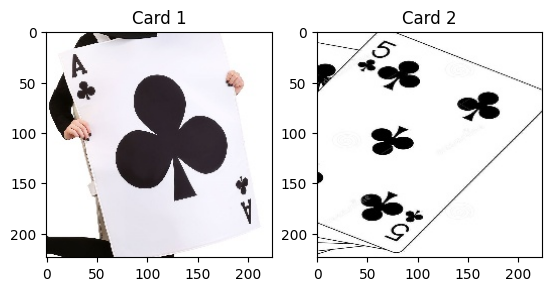

In [4]:
steak_img = load_image("./test_images/train/ace of clubs/001.jpg")
pizza_img = load_image("./test_images/train/five of clubs/007.jpg")

plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(steak_img), plt.title("Card 1")

plt.subplot(1, 2, 2)
plt.imshow(pizza_img), plt.title("Card 2")

plt.show()

`2.` **На наступному кроці нам слід розбити дані на маленькі
групки `(batch)`. Замість того, щоб дивитися відразу на усі
тренувальні дані, модель буде навчатися, використовуючи
дані `"порційно"`**.


`Навіщо це? Є кілька причин:`

-   Велика кількість зображень може не вміститися в
    пам'яті процесора;
-   Модель може неефективно навчатися.
    Загальноприйнятий розмір батчу - `32`.

> Для розбиття на батчі створимо ImageDataGenerator для
> кодного із датасетів.


In [5]:
train_datagen = ImageDataGenerator(rescale=1 / 255.0)
test_datagen = ImageDataGenerator(rescale=1 / 255.0)

train_dir = "./test_images/train"
test_dir = "./test_images/test"
# батчінг
train_data = train_datagen.flow_from_directory(
    directory=train_dir, target_size=(224, 224), batch_size=32, class_mode="categorical"
)
test_data = train_datagen.flow_from_directory(
    directory=test_dir, target_size=(224, 224), batch_size=32, class_mode="categorical"
)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


`3.` **Створення моделі. Тут створено моділь з 3 згорткових шарів**


In [70]:
# Створення моделі Sequential, яка представляє собою послідовний стек шарів
model = Sequential(
    [
        # Перший шар свертки (Conv2D)
        Conv2D(
            filters=10,  # Кількість фільтрів (ядер)
            kernel_size=3,  # Розмір ядра свертки
            strides=1,  # Крок свертки
            padding="valid",  # Тип заповнення (valid означає без заповнення)
            activation="relu",  # Функція активації ReLU
            input_shape=(
                224,
                224,
                3,
            ),  # Розмір вхідних даних (ширина, висота, кількість каналів)
        ),
        # Другий шар свертки (Conv2D) з функцією активації ReLU
        Conv2D(10, 3, activation="relu"),
        # Третій шар свертки (Conv2D) з функцією активації ReLU
        Conv2D(10, 3, activation="relu"),
        # Плоский шар (Flatten), який перетворює тривимірний об'єкт у вектор
        Flatten(),
        # Повнозв'язний шар (Dense) з 53 нейронами та функцією активації softmax
        Dense(53, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

`4.` **На наступному етапі слід натренувати
використаємо `5 епох`.**


In [7]:
history = model.fit(
    train_data, epochs=5, validation_data=test_data, validation_steps=len(test_data)
)

Epoch 1/5


2023-11-16 16:10:21.795810: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 100750880 exceeds 10% of free system memory.
2023-11-16 16:10:21.827019: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 100750880 exceeds 10% of free system memory.


239/239 [==============================] - 461s 2s/step - loss: 4.3550 - accuracy: 0.2497 - val_loss: 2.0600 - val_accuracy: 0.4906
Epoch 2/5
239/239 [==============================] - 423s 2s/step - loss: 0.6994 - accuracy: 0.8402 - val_loss: 2.0550 - val_accuracy: 0.5434
Epoch 3/5
239/239 [==============================] - 456s 2s/step - loss: 0.1463 - accuracy: 0.9768 - val_loss: 2.5269 - val_accuracy: 0.5283
Epoch 4/5
239/239 [==============================] - 417s 2s/step - loss: 0.0697 - accuracy: 0.9919 - val_loss: 2.3359 - val_accuracy: 0.5623
Epoch 5/5
239/239 [==============================] - 428s 2s/step - loss: 0.0433 - accuracy: 0.9962 - val_loss: 2.2987 - val_accuracy: 0.5472


`5.` **Коли модель натреновано, можемо оцінити криві навчання
моделі. Для цього я побудував `графіки залежності точності від кількості епох`.**


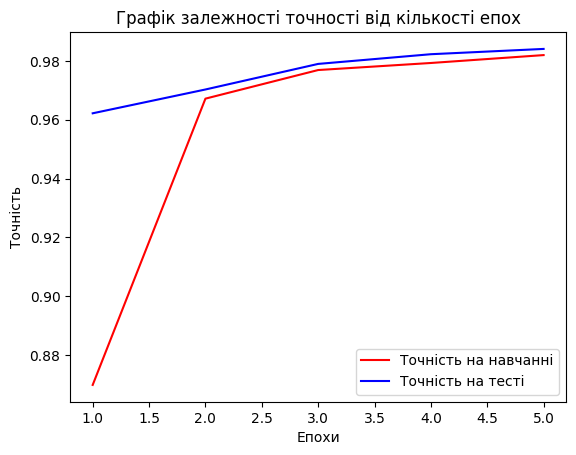

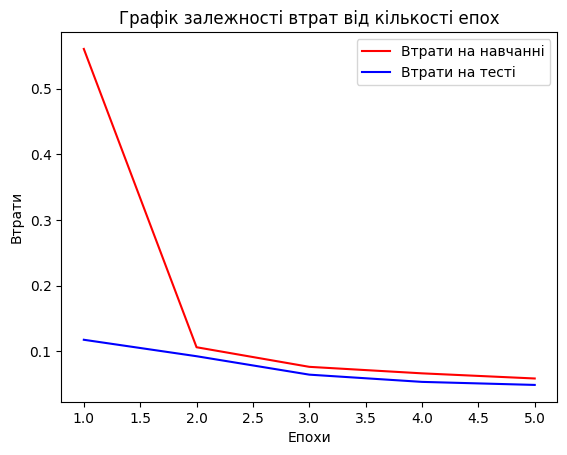

In [108]:
plot_metrics(history)

`Висновок:` **<span style="color:lightgreen">З оцінки кривих видно, що наша модель перенавчається на
тренувальних даних, тож точність прогнозу на тестових даних
падає. Це значить що вона просто запам'ятовує дані які вона оброблює та коли з'явиться нова картинка вона не буде знати що з нею робити.</span>**


`6.` **Щоб виправити перенавчання слід дотриматися іншої архітектури моделі. Розглянемо архітекруту моделі з `агрегувальними шарами`.**


In [121]:
model2 = Sequential(
    [
        # Перший сверточний шар (Conv2D) з фільтрами, ядрами та активацією ReLU
        Conv2D(
            filters=10,
            kernel_size=3,
            strides=1,
            padding="valid",
            activation="relu",
            input_shape=(224, 224, 3),
        ),
        # Перший агрегувальний шар (MaxPooling2D) з розміром пулінгу 2x2
        MaxPooling2D(pool_size=2),
        # Другий сверточний шар (Conv2D) з фільтрами, ядрами та активацією ReLU
        Conv2D(10, 3, activation="relu"),
        # Другий агрегувальний шар (MaxPooling2D) з розміром пулінгу 2x2
        MaxPooling2D(pool_size=2),
        # Третій сверточний шар (Conv2D) з фільтрами, ядрами та активацією ReLU
        Conv2D(10, 3, activation="relu"),
        # Третій агрегувальний шар (MaxPooling2D) з розміром пулінгу 2x2
        MaxPooling2D(pool_size=2),
        # Плоский шар (Flatten), який перетворює тривимірний об'єкт у вектор
        Flatten(),
        # Повнозв'язний шар (Dense) з 128 нейронами та функцією активації ReLU
        Dense(128, activation="relu"),
        # Повнозв'язний шар (Dense) з 53 нейронами та функцією активації softmax
        Dense(53, activation="softmax"),
    ]
)

# Компіляція моделі
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [122]:
history2 = model2.fit(
    train_data, epochs=5, validation_data=test_data, validation_steps=len(test_data)
)

Epoch 1/5
239/239 [==============================] - 135s 561ms/step - loss: 3.0179 - accuracy: 0.2329 - val_loss: 1.9858 - val_accuracy: 0.4830
Epoch 2/5
239/239 [==============================] - 145s 605ms/step - loss: 1.8373 - accuracy: 0.5017 - val_loss: 1.4432 - val_accuracy: 0.5887
Epoch 3/5
239/239 [==============================] - 136s 566ms/step - loss: 1.2473 - accuracy: 0.6493 - val_loss: 1.2686 - val_accuracy: 0.6792
Epoch 4/5
239/239 [==============================] - 92s 386ms/step - loss: 0.7925 - accuracy: 0.7754 - val_loss: 1.3419 - val_accuracy: 0.7057
Epoch 5/5
239/239 [==============================] - 99s 413ms/step - loss: 0.4253 - accuracy: 0.8793 - val_loss: 1.4702 - val_accuracy: 0.6981


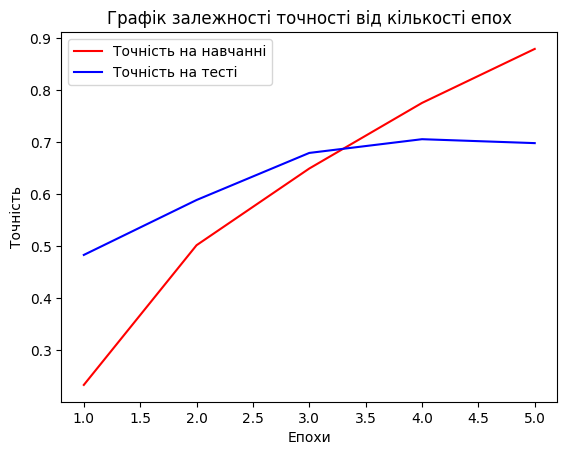

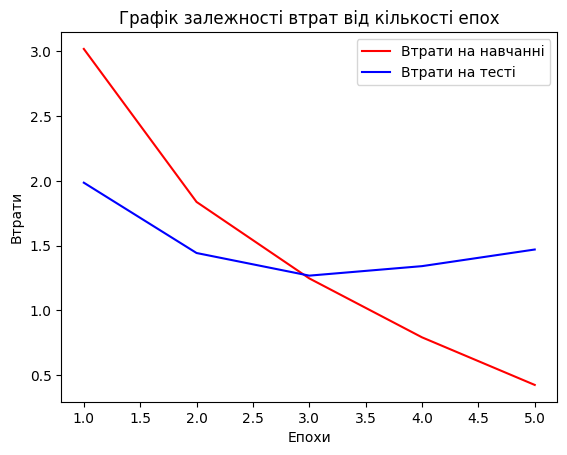

In [123]:
plot_metrics(history2)

`Висновок:` **<span style="color:lightgreen">Нова модель вже не перенавчається, і дає більшу точність
при більшій кількості епох.</span>**


`7.` Розглянемо іншу техніку регуляризації – `аугментацію
(спотворення) даних`.

> `Аугментація даних (data augmentation)` –
> методика створення нових тренувальних даних із наявних.

> Для досягнення хороших результатів нейромережі мають
> навчатися на великих об'ємах даних. Якщо даних мало - слід
> використати аугментацію.

> Ця техніка полягає у зміщенні, повороті, розтягненні та
> інших спотвореннях зображення, з метою навчити модель
> розпізнавати навіть такі дані. Аугментацію можна задати в
> генераторі тренувальних даних.

**Нижче створено новий датасет з аугментованими даними:**


In [15]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=0.2,  # поворот
    shear_range=0.2,  # зсув
    zoom_range=0.2,  # наближення
    width_shift_range=0.2,  # здвиг по ширині
    height_shift_range=0.2,  # здвиг по висоті
    horizontal_flip=True,
)  # віддзеркалення по горизонталі

train_data_augmented = train_datagen_augmented.flow_from_directory(
    directory=train_dir, target_size=(224, 224), batch_size=32, class_mode="categorical"
)
test_data_augmented = train_datagen_augmented.flow_from_directory(
    directory=test_dir, target_size=(224, 224), batch_size=32, class_mode="categorical"
)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


**Проводимо навчання моделі з попереднього пункту на `аугментованих` даних**


In [41]:
history_augmented = model2.fit(
    train_data_augmented,
    epochs=5,
    validation_data=test_data_augmented,
    validation_steps=len(test_data_augmented),
)

Epoch 1/5
239/239 [==============================] - 167s 699ms/step - loss: 3.3906 - accuracy: 0.1188 - val_loss: 2.8442 - val_accuracy: 0.1698
Epoch 2/5
239/239 [==============================] - 159s 664ms/step - loss: 2.8357 - accuracy: 0.2057 - val_loss: 2.7817 - val_accuracy: 0.2075
Epoch 3/5
239/239 [==============================] - 173s 724ms/step - loss: 2.6538 - accuracy: 0.2516 - val_loss: 2.5895 - val_accuracy: 0.2642
Epoch 4/5
239/239 [==============================] - 175s 733ms/step - loss: 2.5121 - accuracy: 0.3004 - val_loss: 2.2671 - val_accuracy: 0.3208
Epoch 5/5
239/239 [==============================] - 171s 716ms/step - loss: 2.3890 - accuracy: 0.3311 - val_loss: 2.3439 - val_accuracy: 0.3283


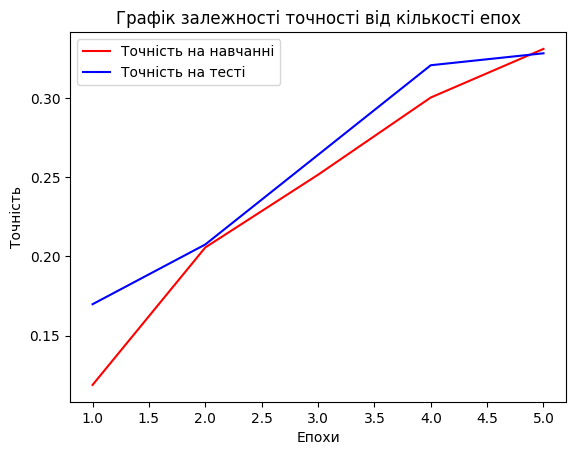

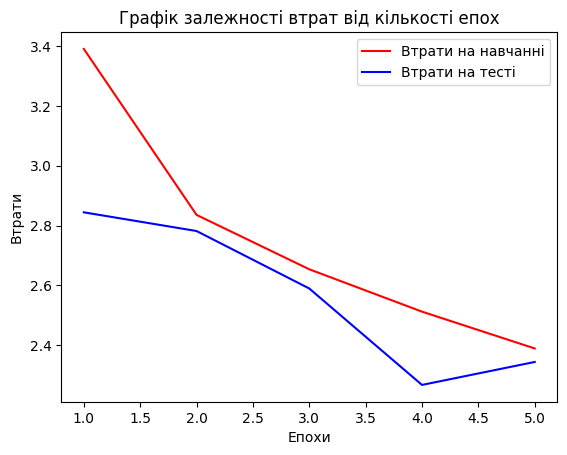

In [42]:
plot_metrics(history_augmented)

`Висновок:` **<span style="color:lightgreen">В даному випадку, модель можна припинити навчати на
четвертій епосі.</span>**


**<span style="color:lightblue">Можливі шляхи для вдосконалення нашої моделі:</span>**

-   збільшення числа `шарів`;
-   збільшення числа `фільтрів` у згорткових шарах (з 10 до
    32,64,128);
-   `навчати` модель довше;
-   знайти оптимальний `learning rate`;
-   `отримати` більше данних;
-   використовувати `transfer learning` (вже натреновані
    моделі).


`8.` **Використаємо для даної задачі нейромережу з
архітектурою `TinyVGG` і аугментованими даними.**


In [66]:
model_tiny_vgg = Sequential(
    [
        # Перший сверточний шар (Conv2D) з 10 фільтрами, ядром 3x3 та активацією ReLU
        Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
        # Другий сверточний шар (Conv2D) з 10 фільтрами, ядром 3x3 та активацією ReLU
        Conv2D(10, 3, activation="relu"),
        # Шар агрегації (MaxPooling2D) для зменшення просторових розмірів
        MaxPool2D(),
        # Третій сверточний шар (Conv2D) з 10 фільтрами, ядром 3x3 та активацією ReLU
        Conv2D(10, 3, activation="relu"),
        # Четвертий сверточний шар (Conv2D) з 10 фільтрами, ядром 3x3 та активацією ReLU
        Conv2D(10, 3, activation="relu"),
        # Другий шар агрегації (MaxPooling2D) для зменшення просторових розмірів
        MaxPool2D(),
        # Плоский шар (Flatten), який перетворює тривимірний об'єкт у вектор
        Flatten(),
        # Повнозв'язний шар (Dense) з 53 нейронами та функцією активації softmax
        Dense(53, activation="softmax"),
    ]
)

# Компіляція моделі
model_tiny_vgg.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

In [18]:
# Fit model
history_tiny_vgg = model_tiny_vgg.fit(
    train_data_augmented,
    epochs=5,
    validation_data=test_data_augmented,
    validation_steps=len(test_data_augmented),
    verbose=1,
)

Epoch 1/5
239/239 [==============================] - 230s 957ms/step - loss: 3.6592 - accuracy: 0.0674 - val_loss: 3.2729 - val_accuracy: 0.1132
Epoch 2/5
239/239 [==============================] - 227s 948ms/step - loss: 3.2327 - accuracy: 0.1320 - val_loss: 3.1366 - val_accuracy: 0.1132
Epoch 3/5
239/239 [==============================] - 228s 950ms/step - loss: 3.0918 - accuracy: 0.1632 - val_loss: 2.9753 - val_accuracy: 0.2000
Epoch 4/5
239/239 [==============================] - 230s 960ms/step - loss: 3.0583 - accuracy: 0.1741 - val_loss: 2.9492 - val_accuracy: 0.1660
Epoch 5/5
239/239 [==============================] - 239s 997ms/step - loss: 2.9312 - accuracy: 0.1940 - val_loss: 2.8626 - val_accuracy: 0.2000


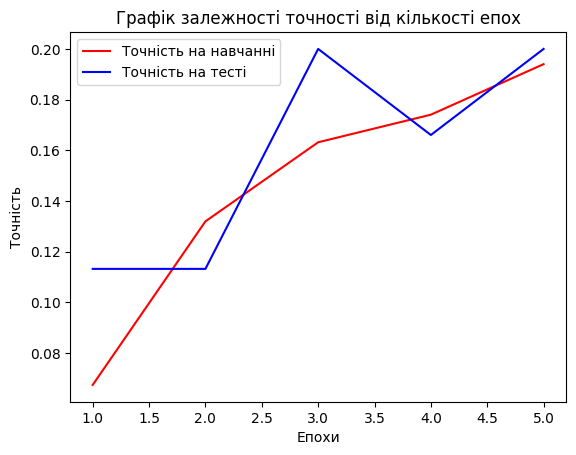

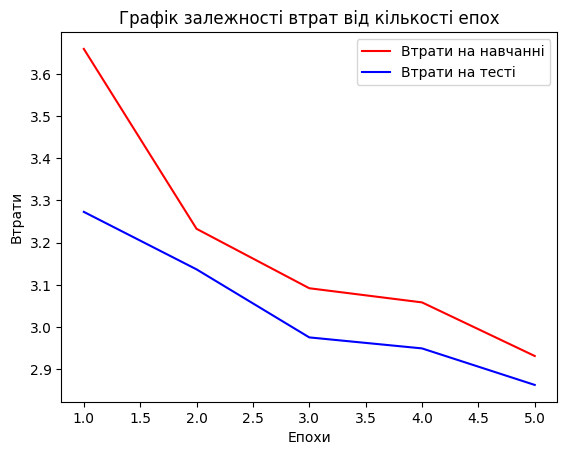

In [19]:
plot_metrics(history_tiny_vgg)

## `Завдання 2`. <span style="color:lightblue">Повторити приклад з теоретичної частини.</span>


`1.` **Імпорт та підготовка даних**

In [106]:
# імпорт датасету
from tensorflow.keras.datasets import mnist

In [105]:
# Загрузка данных MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`2.` **Вивід прикладу даних з датасету**

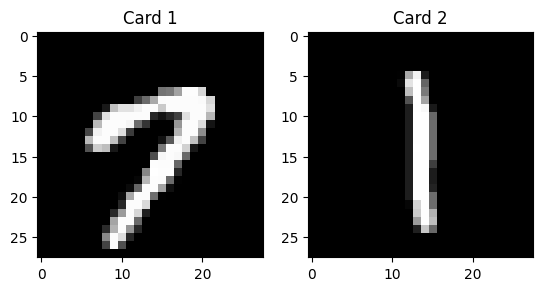

In [103]:
plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(train_images[15], cmap="gray"), plt.title("Card 1")

plt.subplot(1, 2, 2)
plt.imshow(train_images[14], cmap="gray"), plt.title("Card 2")

plt.show()

`3.` **Створення моделі**

In [98]:
# Створення моделі
model_mnist = Sequential(
    [
        Conv2D(10, 3, activation="relu", input_shape=(28, 28, 1)),
        Conv2D(10, 3, activation="relu"),
        MaxPooling2D(),
        Conv2D(10, 3, activation="relu"),
        Conv2D(10, 3, activation="relu"),
        MaxPooling2D(),
        Flatten(),
        Dense(10, activation="softmax"),
    ]
)

# Компіляція моделі
model_mnist.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

`4.` **Навчання моделі**

In [117]:
# Fit model
history_mnist = model_mnist.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=32,
    validation_data=(test_images, test_labels),
)

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.0543 - val_accuracy: 0.9830
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0560 - val_accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0379 - accuracy: 0.9881 - val_loss: 0.0561 - val_accuracy: 0.9823
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0370 - accuracy: 0.9876 - val_loss: 0.0624 - val_accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.0544 - val_accuracy: 0.9837


`5.` **Вивід метрік**

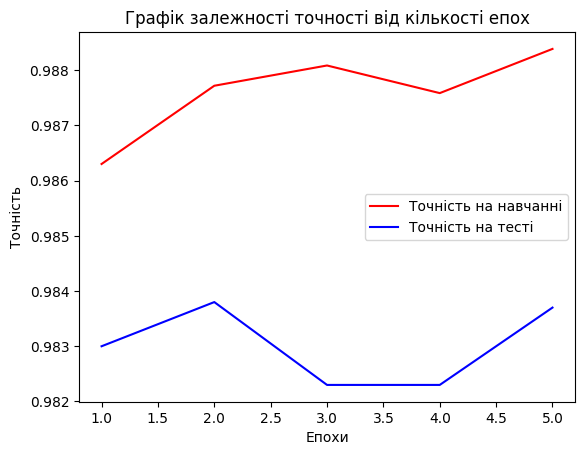

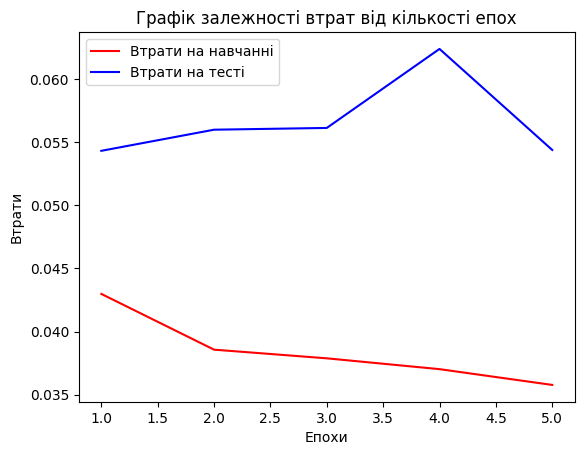

In [125]:
plot_metrics(history_mnist)

`6.` **Спроба розпізнати цифру**

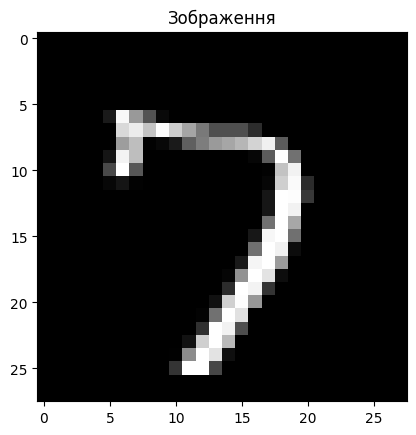

1/1 [==============================] - 0s 17ms/step
Нейронка вважає що це цифра:  7


In [124]:
make_prediction(train_images[868], model_mnist)